### Financial Analytics
### Name: Kshitij Chilate
### Date: 19/08/2025
### Aim: CAPM-Based Asset Pricing Analysis

Experiment 5: CAPM-Based Asset Pricing Analysis

Difficulty: Moderate| Unit II |Tools: statsmodels, matplotlib, pandas, yfinance, Course Outcome 2
Objective: Use the Capital Asset Pricing Model (CAPM) to evaluate whether a stock is fairly priced with respect to market risk. We will estimate Beta ($\beta$) and Alpha ($\alpha$) via linear regression between a stock's excess returns and market excess returns.

Theory: Capital Asset Pricing Model(CAPM)

The Capital Asset Pricing Model (CAPM) is a fundamental financial theory used to determine the expected return of an asset based on its risk relative to the market.

**CAPM Formula :**

$$ R_i = R_f + \beta (R_m - R_f) + \alpha $$

**Where**
$$ R_i : Expected~return~of~the~asset $$

$$ R_f : Risk\text{-}free~rate~of~return~(e.g.,~government~bonds)$$

$$ R_m : Expeceted~return~of~the~market~portfolio $$

$$ \beta : Measure~of~systematic~risk$$

$$ \alpha : Asset~-~specific~excess~return~$$

Intrepretation

*   The CAPM explains how much return an investor should expect given the asset's sensitivity ($\beta$) ti market movements.
*   Alpha ($\alpha$) represents the return that cannot be explained by the market. A positive alpha suggests that the asset outperformed expectations, while a **negative alpha** implies underperformance.
*   Beta measures the responsiveness of an asset to market returns. A **beta > 1** implies higher volatility than the market, whereas **beta < 1** implies more stability.


Importance

CAPM is widely used in portfolio management security valuation and capital budgeting. It provides a benchmark to determine whether an asset is overvalued , undervalued , or fairly priced relative to risk.

In [ ]:
# Step 1: Import required libraries
#Import required libraries for data handling , analysis , and visualisation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
#Apply seaborn-style aesthetics for cleaner charts
plt.style.use('seaborn-v0_8')

In [ ]:
#Step 2: Download stock and market data
stock = 'AAPL'   #Target stock
market = '^GSPC'   # S&P 500 index

#Download historical data for both stock and market index
data = yf.download([stock, market], start='2020-01-01', end='2024-01-01',auto_adjust=False)['Adj Close']
#Remove rows with missing values to ensure clean calculations
data = data.dropna()
#Rename columns to simpler names: 'Stock' and 'Market'
data.columns = [stock, market]
data.head()

[*********************100%***********************]  2 of 2 completed


,AAPL,^GSPC
Date,,
2020-01-02,72.538536,3257.850098
2020-01-03,71.833290,3234.850098
2020-01-06,72.405670,3246.280029
2020-01-07,72.065163,3237.179932
2020-01-08,73.224411,3253.050049


In [ ]:
# Step 3: Calculate daily returns
# Remove rows with missing values to ensure clean calculations
returns = data.pct_change().dropna()
returns.head()

,AAPL,^GSPC
Date,,
2020-01-03,-0.009722,-0.007060
2020-01-06,0.007968,0.003533
2020-01-07,-0.004703,-0.002803
2020-01-08,0.016086,0.004902
2020-01-09,0.021241,0.006655


In [ ]:
# Step 4: Define risk-free rate (e.g., 4% annually)
# define the daily risk-free rate from the annual rate (e.g., 4%)
risk_free_rate = 0.04 / 252  # Daily rick-free rate
returns['Stock_Excess'] = returns[stock] - risk_free_rate
returns['Market_Excess'] = returns[market] - risk_free_rate
returns.head()

,AAPL,^GSPC,Stock_Excess,Market_Excess
Date,,,,
2020-01-03,-0.009722,-0.007060,-0.009881,-0.007219
2020-01-06,0.007968,0.003533,0.007809,0.003375
2020-01-07,-0.004703,-0.002803,-0.004862,-0.002962
2020-01-08,0.016086,0.004902,0.015927,0.004744
2020-01-09,0.021241,0.006655,0.021082,0.006497


Each row is one trading day. We are looking at returns (not prices).

**Stock** --> How much the stock went up or down that day.

**Market** --> How much the market index (like S&P 500) went up or down.

**Stock_Excess** --> Stock return minus the risk-free rate.

**Market_Excess** --> Stock return minus the risk-free rate.

(The risk-free rate is a very small daily number, ~ 0.016%, so the "excess" is almost the same as the raw return)

Example rows

2020-01-03


So, each day we are just recording: Did the stock do better or worse than the market, after adjusting for the safe return?


OLS = Ordinary Least Squares, the most common method for regression.

It finds the bestfit line by minimizing the sum of squared errors (Difference between actual v.s. predicted stock returns)

This gives you estimate for:

$\alpha$ (Intercept)

$\beta$ (slope)

In [ ]:
# Step 5 : Run CAPM Regression
# Calculate excess return for the market index
X = sm.add_constant(returns['Market_Excess'])
y = returns['Stock_Excess']
# Use Ordinary Least Square to fir the CAPM model
model = sm.OLS(y, X).fit()
# Run the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock_Excess   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1993.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          1.43e-240
Time:                        11:14:20   Log-Likelihood:                 2999.9
No. Observations:                1005   AIC:                            -5996.
Df Residuals:                    1003   BIC:                            -5986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.656

In [ ]:
# Step-by-step CAPM regression: from scratch

X = returns['Market_Excess']
y = returns['Stock_Excess']
# Add a constant (intercept) to X for alpha
# Add a constant (intercept term) for regression
X = sm.add_constant(X)
# Fit OLS regression
capm_model = sm.OLS(y, X).fit()

# Output Alpha and Beta
alpha = capm_model.params['const']
beta = capm_model.params['Market_Excess']

print(f"CAPM Alpha (a): {alpha:.6f}")
print(f"CAPM Beta (b): {beta:.4f}")

# Full regression summary
capm_model.summary()


CAPM Alpha (a): 0.000640
CAPM Beta (b): 1.1897


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock_Excess   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1993.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          1.43e-240
Time:                        11:14:20   Log-Likelihood:                 2999.9
No. Observations:                1005   AIC:                            -5996.
Df Residuals:                    1003   BIC:                            -5986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.656      0.098      -0.000       0.001
Market_Excess     1.1897      0.027     44.643      0.000       1.137       1.242
==============================================================================
Omnibus:                      171.203   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1282.886
Skew:                           0.553   Prob(JB):                    2.66e-279
Kurtosis:                       8.423   Cond. No.                         69.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

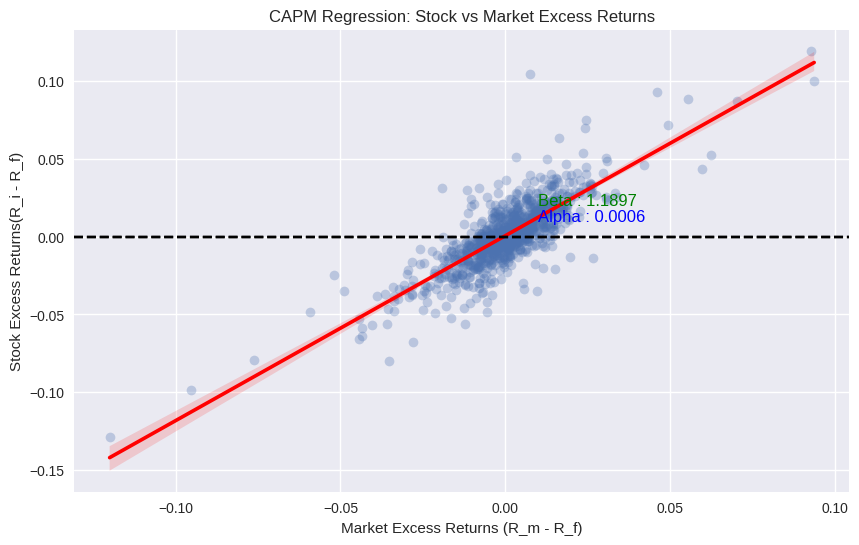

In [ ]:
# Visualize Alpha and Beta using CAPM Scatter Plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x=returns['Market_Excess'], y=returns['Stock_Excess'], line_kws= {'color' : 'red'}, scatter_kws= {'alpha' : 0.3})
plt.title('CAPM Regression: Stock vs Market Excess Returns')
plt.xlabel('Market Excess Returns (R_m - R_f)')
plt.ylabel('Stock Excess Returns(R_i - R_f)')

# Annotate the plot with Alpha and Beta values
plt.axhline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.text(0.01, 0.01, f'Alpha : {alpha:.4f}', fontsize=12, color='blue')
plt.text(0.01, 0.02, f'Beta : {beta:.4f}', fontsize=12, color='green')
plt.grid(True)
plt.show()